In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

![xkcd](https://imgs.xkcd.com/comics/machine_learning_2x.png)

____

## Problem 1: Inverting a Matrix By Hand (10pts)

I mentioned in class that we will mostly rely on Python libraries for performing linear algebra operations. Why not, isn't that why they were developed?!

However, it is also good practice to know how to do these by yourself for the simplest cases. This allows you to explore ideas without a computer and build your intuition for what the libraries are doing. We'll learn here how to invert a $2\times 2$ matrix by hand.

Follow these steps:
1. Make a $2\times 2$ matrix $A = \begin{bmatrix} a & b \\ c & d\end{bmatrix}$ using a numPy array (you might want to try several choices); if you don't know about these already, NumPy has [some nice functionality for creating arrays](https://numpy.org/doc/stable/user/basics.creation.html), which can be matrices, of various types.
2. Find the [determinant](https://en.wikipedia.org/wiki/Determinant) of your matrix, using:
$$ \mathrm{det}(A) = ad - cb.$$
Do this by hand, not with a library.
3. Form the inverse $A^{-1}$ with
$$A^{-1} = \frac{1}{\mathrm{det}(A)}\begin{bmatrix} d & -b \\ -c & a\end{bmatrix}.$$
Show all of your steps using $\LaTeX$ in a markdown cell. 
4. Now that you have $A^{-1}$, use the rules of matrix multiplication to find the product $A^{-1}A$. Show your steps.
5. Vary the matrix $A$ and comment on anything interesting you see. For example, what would $A$ look like if its determinant were $0$? For example, make a matrix for which $b=2a$ and $d = 2c$. 

In [2]:
# Creating Two 2x2 matrix using numpy

A1 = np.array([[1,2],[3,4]]) 
A2 = np.array([[1,2],[3,6]]) # for b=2a and d = 2c condition

# Calculating Determinant
print(np.linalg.det(A1))
print(np.linalg.det(A2))


-2.0000000000000004
-3.330669073875464e-16


In [3]:
# Calculating Inverse 
Ainv = np.linalg.inv(A1)
print(Ainv)
# Doing matrix multiplication
print(np.matmul(A1, Ainv))

[[-2.   1. ]
 [ 1.5 -0.5]]
[[1.00000000e+00 1.11022302e-16]
 [0.00000000e+00 1.00000000e+00]]


In Latex 

The Matrix are :- 
$$A1 = \begin{bmatrix} 1 & 2 \\ 3 & 4\end{bmatrix}$$
$$A2 = \begin{bmatrix} 1 & 2 \\ 3 & 6\end{bmatrix}$$

The determinant of the matrix are :- 
$$ \mathrm{det}(A1) = 1\times 4 - 2\times 3 = -2$$
$$ \mathrm{det}(A2) = 1\times 6 - 2\times 3 = 0$$
 
The inverse of the matrix are :-
$$A1^{-1} = \frac{1}{-2}\begin{bmatrix} 4 & -2 \\ -3 & 1\end{bmatrix}$$
$$A2^{-1} = \frac{1}{0}\begin{bmatrix} 6 & -2 \\ -3 & 1\end{bmatrix}$$

As we can see, the inverse of a matrix can not be calculated as the determinant is equal to zero. The condition b = 2a and d = 2c restricts us to proceed with the calculation. Hence, it is necessary to check the value of determinant before calculating the inverse.



The product of matrix A1 with $A1^{-1}$ :-
$$A1^{-1}\times A1 = \frac{1}{-2}\begin{bmatrix} 1\times 4 + 2\times -3 & 1\times -2 + 2\times 1 \\ 3\times 4 - 4\times -3 & 3\times -2 + 4\times 1\end{bmatrix}$$

$$A1^{-1}\times A1 = \frac{1}{-2}\begin{bmatrix} -2 & 0 \\ 0 & -2\end{bmatrix}$$

$$A1^{-1}\times A1 = \begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix} = I$$

$$A1^{-1}\times A1 = I (Identity Matrix)$$


____

## Problem 2: Polynomial Regression (15pts)

We have learned that linear regression refers to fitting data to a model in which the weights appear linearly. But, the model itself need not use linear functions. The Gaussian RBFs we used were an example of that. Another very common choice is that of a polynomial. Let's code two cases in which the number of weights is and is not the same as the number of data points. 

We wish to model our data with a polynomial. The data you are given is:
$$x = [-2, -0.5, 0, 1] ,$$
$$y = [0, 0.9375, 1, 3] .$$
Because you have four data points, you are tempted to use a model with four parameters, such as:
$$y = w_0 + w_1x + w_2x^2 + w_3x^3 .$$
But, you are also worried that the data may be noisy so you also want to fit it to only three weights. You decide that the $x^3$ term could cause large excursions that might follow the noise, so your second model is:
$$y = w_0 + w_1x + w_2x^2.$$

Using only libraries from `linalg`, fit the data to both models. Plot the data and the two resulting models. 

As we saw last week, the coding for this is trivial - the hard part is setting up the vectors and matrices. Slow down and be sure you understand what you are doing: this will help you set up the problem so that it is very easy. I'll give you a hint:
$$\underbrace{\begin{bmatrix} y_1\\y_2\\y_3\\y_4\end{bmatrix}}_{4\times 1} = \underbrace{\begin{bmatrix} 0\\0.09375\\1\\3\end{bmatrix}}_{4\times 1} =\underbrace{\begin{bmatrix} 1 & -2 & 4 & 8 \\ 1 & -0.5 & 0.25 & 0.125 \\\vdots  \end{bmatrix}}_{4\times 4}\underbrace{\begin{bmatrix} w_0\\w_1\\w_2\\w_3\end{bmatrix}}_{4\times 1}.$$
It is crucial that you know where this came from!! 

You then use Python to get the weight vector ${\bf w}$, which allows you to plot the resulting polynomial. In one case you will need to use the pseudoinverse, [the `pinv` function](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html); or in [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.pinv.html#scipy.linalg.pinv), because you have more data points than weights. 

If you write your code in a general way, you can also try the third model:
$$y = w_0 + w_1x.$$
In the world of machine learning, we would need to figure out which of these three models is the "best", a process called "_model selection_". We won't worry about it now, but I wanted you to at least be aware of the idea. A second idea I'll introduce here is "_regularization_", since it is connected. Regularization is penalizing weights that cause large excursions; here, we are doing this by hand by dropping the higher-order terms (e.g., setting $w_3=0$), thereby prohibiting predictions with large excursions.  There are very powerful techniques for automating this. There is a lot to learn from this problem other than just setting up regression problems and inverting a matrix! 🤓 





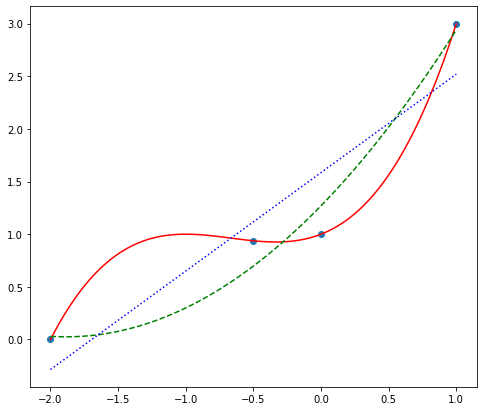

In [4]:
# Using linear algebra
X = np.array([-2,-0.5,0,1])
Y = np.array([0,0.9375,1,3])
Y = Y.T

def matrix(x,d):
     
    if (d == 3):
        K = np.array([[1,x[i],x[i]**2,x[i]**3] for i in range(len(x))])
    elif (d == 2) : 
        K = np.array([[1,x[i],x[i]**2] for i in range(len(x))])
    elif (d == 1) :
        K = np.array([[1,x[i]] for i in range(len(x))])
    else :
        print("Please choose D out of the following values - (1,2,3)")
    return (K)
    
    
k3 = matrix(X,3)
k2 = matrix(X,2)
k1 = matrix(X,1)
w3 = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(k3),k3)),np.transpose(k3)),Y)
w_3 = np.linalg.inv(k3)@Y
w2 = np.linalg.pinv(k2)@Y
w1 = np.linalg.pinv(k1)@Y

def model_pred(x,w):
    y = x@w
    return (y)

xx = np.linspace(-2,1, 100)

X3 = matrix(xx,3)
X2 = matrix(xx,2)
X1 = matrix(xx,1)
Y3 = model_pred(X3,w3)
Y2 = model_pred(X2,w2)
Y1 = model_pred(X1,w1)

plt.subplots(1,1,figsize=(8, 7))
plt.scatter(X,Y)
plt.plot(xx, Y3,'-r')
plt.plot(xx, Y2,'--g')
plt.plot(xx, Y1,':b')

____

## Problem 3: Outer Product (5pts)

Given the two vectors:
$$v_1 = \begin{bmatrix} 1 \\ 2 \\ 3\end{bmatrix} \: v_2 = \begin{bmatrix} 1 \\ 1 \\ 1\end{bmatrix},$$
compute the two outer products
$$v_1 v_2^T,$$
and
$$v_2 v_1^T.$$
Do this _both_ by hand, and show your work using $\LaTeX$, and using a NumPy or SciPy library. Does the order of the vectors matter for the outer product? What about the inner product? 




In [5]:
# Computing using numpy
# For outer product
v1 = np.array([[1,2,3]])
v2 = np.array([[1,1,1]])
print(np.matmul(v1, v2.T))
print(np.matmul(v2, v1.T))
print("The order in the outer product does not matter")

[[6]]
[[6]]
The order in the outer product does not matter


In [6]:
# For inner product
print(np.matmul(v1.T, v2))
print(np.matmul(v2.T, v1))
print("The order in the inner product does matter")

[[1 1 1]
 [2 2 2]
 [3 3 3]]
[[1 2 3]
 [1 2 3]
 [1 2 3]]
The order in the inner product does matter


For outer product, we have our matrix as-
$$v_1 = \begin{bmatrix} 1 \\ 2 \\ 3\end{bmatrix} \: v_2 = \begin{bmatrix} 1 \\ 1 \\ 1\end{bmatrix},$$
$$v_1 v_2^T = \begin{bmatrix} 1 \\ 2 \\ 3\end{bmatrix} \begin{bmatrix} 1 & 1 & 1\end{bmatrix} = \begin{bmatrix} 1\times 1 + 2\times 1 + 3\times 1\end{bmatrix} = 6 $$
$$v_2 v_1^T = \begin{bmatrix} 1 \\ 1 \\ 1\end{bmatrix} \begin{bmatrix} 1 & 2 & 3\end{bmatrix} = \begin{bmatrix} 1\times 1 + 1\times 2 + 1\times 3\end{bmatrix} = 6 $$

As the value is same in both the instances, we can say that the order does not matter in outer product. 

For inner product:-
$$v_1^T v_2 = \begin{bmatrix} 1 & 2 & 3\end{bmatrix} \begin{bmatrix} 1 \\ 1 \\ 1\end{bmatrix} = \begin{bmatrix} 1\times 1 & 1\times 1 & 1\times 1\\ 2\times 1 & 2\times 1 & 2\times 1\\ 3\times 1 & 3\times 1 & 3\times 1\end{bmatrix}$$
$$v_1^T v_2 = \begin{bmatrix} 1 & 1 & 1 \\ 2 & 2 & 2 \\ 3 & 3 & 3 \end{bmatrix}$$
$$v_2^T v_1 = \begin{bmatrix} 1 & 1 & 1\end{bmatrix} \begin{bmatrix} 1 \\ 2 \\ 3\end{bmatrix} = \begin{bmatrix} 1\times 1 & 1\times 2 & 1\times 3\\ 1\times 1 & 1\times 2 & 1\times 3\\ 1\times 1 & 1\times 2 & 1\times 3\end{bmatrix}$$
$$v_2^T v_1 = \begin{bmatrix} 1 & 2 & 3 \\ 1 & 2 & 3 \\ 1 & 2 & 3 \end{bmatrix}$$

As we get different matrices from the inner products we can say that the order in the inner product matters in matrix multiplication. 

____

## Problem 4: SVD (10pts)

Read in the iris dataset (get it from anywhere you want) and perform SVD on it [using the `linalg` library](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html). Answer these questions:
1. what does `svd` return? discuss and show with code
2. in what form does it return Σ? the full matrix? 
3. does `svd` return $V$ or $V^T$?
4. what does a plot of the singular values $\sigma_n$ versus $n$ look like? use both linear scale and log-linear

In [7]:
# starter code
from sklearn.datasets import load_iris
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

data = load_iris()

X = data["data"]
y = data["target"]
# print(X,y)
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# now, to SVD....
u, s, vh = np.linalg.svd(X)
print(u, " The first orthogonal matrix U")
print(s, " Singular values of our dataset Sigma")
print(vh, " The second singular vector matrix V.T")

[[-0.06161685  0.12961144  0.0021386  ... -0.09343429 -0.09573864
  -0.08085465]
 [-0.05807094  0.11101978  0.07067239 ...  0.03690405 -0.03153954
   0.01309526]
 [-0.05676305  0.11796647  0.00434255 ...  0.03066199  0.19531473
   0.13569909]
 ...
 [-0.0940593  -0.0498297  -0.04144001 ...  0.98181631 -0.02194514
  -0.00894446]
 [-0.09488961 -0.05610123 -0.21297821 ... -0.02155617  0.94178018
  -0.02971961]
 [-0.08847836 -0.0515697  -0.09575285 ... -0.0086052  -0.03021088
   0.9736599 ]]  The first orthogonal matrix U
[95.95991387 17.76103366  3.46093093  1.88482631]  Singular values of our dataset Sigma
[[-0.75110816 -0.38008617 -0.51300886 -0.16790754]
 [ 0.2841749   0.5467445  -0.70866455 -0.34367081]
 [ 0.50215472 -0.67524332 -0.05916621 -0.53701625]
 [ 0.32081425 -0.31725607 -0.48074507  0.75187165]]  The second singular vector matrix V.T


* SVD is a data reduction tool, and gives us the most important features to analyse and describe the data. It can be said that it is data driven generalization of the fourier transformation. It is mainly used for linear system of equation for non square matrices. It is also basis of PCA, where singular vectors $U$ and $V^T$ represent the two different components of eigen vector. SVD helps us taking high dimension data and understanding the correlation between them. 

* The SVD takes a collection of column vector as input and gives its decomposition in three different matrices $U$ , sigma and $V^T$. The matrix $U$ and $V^T$ are unitary orthogonal matrices, arranged in manner of importance. That is, the most important singular vector are placed first in the matrices, and they provide the maximum information gain on the data. Similarly, singular values are also arranged in manner of importance. 

* The singular value decomposition can be computed using the following observations:
    * The left-singular vectors of X are a set of orthonormal eigenvectors of $XX^T$
    * The right-singular vectors of X are a set of orthonormal eigenvectors of $X^TX$
    * The non-zero singular values of X (found on the diagonal entries of $\mathbf{\Sigma}$) are the square roots of the non-zero eigenvalues of both $X^TX$ and $XX^T$.

* The left and right matrices are rotation or reflection of the space and sigma matrix represents the scaling of each coordinate by respective sigma value.

* The function returned sigma in form of ndarray of size four

* The function SVD in numpy returns $V^T$

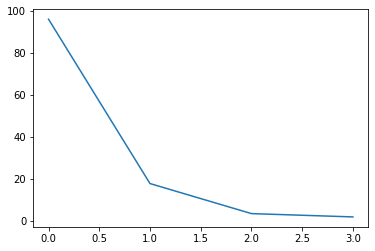

In [8]:
plt.plot(s)

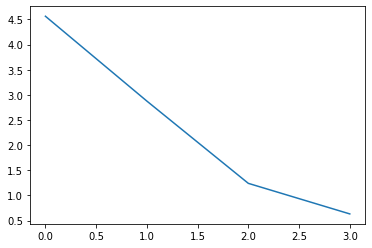

In [9]:
plt.plot(np.log(s))

____

## Problem 5: SVD (10pts)

We are going to use real (iris) data to understand the singular values a bit better. The idea is very simple: we want to take a data matrix and approximate is with a lower rank matrix, using the singular values as our guide.

If you take the SVD and write it out in terms of the columns of $U$ and $V$, which are vectors, you will find that
$$X = \sum_{i=1}^r \sigma_i {\bf u}_i {\bf v}^T_i .$$

Be sure you understand the shape of these vectors/matrices! Are these matrix multiplications, inner products, outer products? Go slowly and be sure you understand what you are looking at. 

If we start in 2D and only use the first singular value in this sum, then the result should be...._in 1D_? Let's check! 

* Take the iris dataset and choose any two columns; in fact, try all combinations of two columns. 
* Plot one column versus the other.
* From those two columns, find its SVD. 
* From the SVD for a new, smaller $X$ using only the $i=1$ term in that sum ($X \approx \sigma_1 {\bf u}_1 {\bf v}_1^T$). 
* Add to the plot you just made the data in the new matrix. (That is, plot one column versus the other, on top of the original data.) 

A hint is to use the result from the outer product library you explored above. 

There is one issue that could be confusing: what is ${\bf v}^T_i$? This is the $i$ th column of ${\bf v}$, then transposed. It is **not** the $i$ th column of $V^T$!! If it helps, [read this page](https://en.wikipedia.org/wiki/Singular_value_decomposition). 


The Σ that was returned is: [53.63004331  2.97631552]


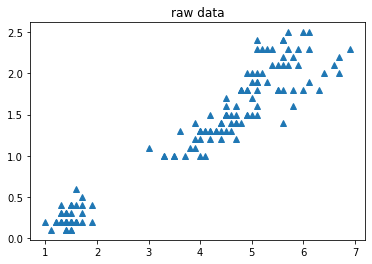

In [10]:
# starter code
from sklearn.datasets import load_iris
data = load_iris()

# choose two columns out of the four
A = data["data"][:,2:4]

# let's look at it
plt.plot(A[:,0], A[:,1],'^')
plt.title("raw data")

# perform SVD
U, S, VT = linalg.svd(A)
V = VT.T

print("The Σ that was returned is:", S)

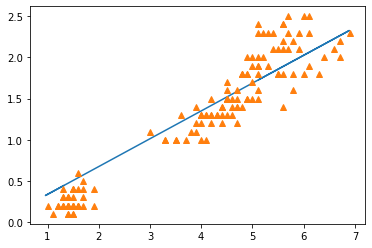

In [11]:
# helper code, if you need it...
# if you use this, open a markdown cell and explain every detail
smaller = S[0]*np.outer(U[:,0],V[:,0]) 
plt.plot(smaller[:,0], smaller[:,1])
plt.plot(A[:,0], A[:,1], '^')

In the above code, a smaller matrix is calculated in the line `smaller = S[0]*np.outer(U[:,0],V[:,0])`. Here, we are taking the first value/vector of all the matrices (S,U,V) we created from SVD. `S[0]` fetches the first value from the S array, i.e. *53.63* in our case. `np.outer` performs the outer product between the vectors/columns present at 0th position of the matrices `U` and `V`. The outer product performs the transpose operation for us, thus we do not have to explicitly perform the operation. 

The code `plt.plot(smaller[:,0], smaller[:,1]) and plt.plot(A[:,0], A[:,1], '^')` simply plots both the vectors/columns present in smaller and A matrices. In this way, we are able to examine the original data, and the constructed data from the SVD. 

Note- If we add all the singular value decomposition we will get our original raw data.

The Σ that was returned is: [73.96029483  7.48697458]


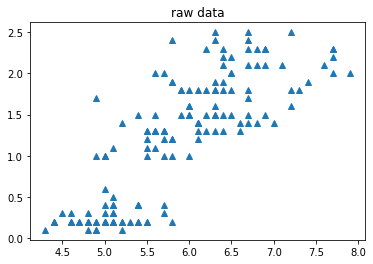

In [12]:
# choose two columns out of the four
# After trying all the column combinations, going with column  0 and 3 to get the best fit for our smaller matrix with rank = 1
A = data["data"][:,[0,3]]

# let's look at it
plt.plot(A[:,0], A[:,1],'^')
plt.title("raw data")

# perform
U, S, VT = linalg.svd(A)
V = VT.T

print("The Σ that was returned is:", S)

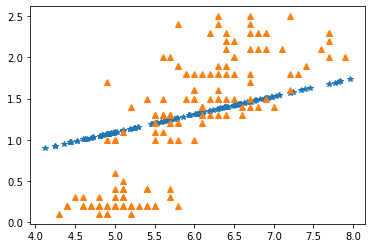

In [13]:
smaller = S[0]*np.outer(U[:,0],V[:,0])   
plt.plot(smaller[:,0], smaller[:,1], "*")
plt.plot(A[:,0], A[:,1], '^')

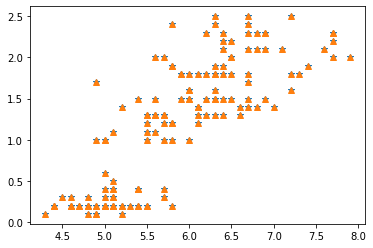

In [14]:
# When adding upto the rank of the matrix. # To analyse. 
exact = S[0]*np.outer(U[:,0],V[:,0]) + S[1]*np.outer(U[:,1],V[:,1])  
plt.plot(exact[:,0], exact[:,1], "*")
plt.plot(A[:,0], A[:,1], '^')